In [3]:
!pip install tensorflow


In [3]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Use only 3 classes: 0=airplane, 1=automobile, 2=bird
selected_classes = [0, 1, 2]
train_filter = np.isin(y_train, selected_classes).flatten()
test_filter = np.isin(y_test, selected_classes).flatten()

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

# Normalize and flatten images
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# One-hot encode labels
def one_hot(y):
    n_classes = len(selected_classes)
    y_encoded = np.zeros((y.shape[0], n_classes))
    for i in range(y.shape[0]):
        y_encoded[i, selected_classes.index(y[i][0])] = 1
    return y_encoded

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)


In [5]:
input_size = 3072   # 32x32x3
hidden_size = 128
output_size = 3
lr = 0.01

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [7]:
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))


In [21]:
epochs = 150
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1 = X_train @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    y_pred = softmax(Z2)

    # Loss
    loss = cross_entropy_loss(y_pred, y_train_oh)
    losses.append(loss)

    # Backward pass
    dZ2 = y_pred - y_train_oh
    dW2 = A1.T @ dZ2 / X_train.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_deriv(Z1)
    dW1 = X_train.T @ dZ1 / X_train.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")


Epoch 1, Loss: 1.0418
Epoch 2, Loss: 1.0411
Epoch 3, Loss: 1.0404
Epoch 4, Loss: 1.0397
Epoch 5, Loss: 1.0390
Epoch 6, Loss: 1.0383
Epoch 7, Loss: 1.0376
Epoch 8, Loss: 1.0369
Epoch 9, Loss: 1.0362
Epoch 10, Loss: 1.0355
Epoch 11, Loss: 1.0348
Epoch 12, Loss: 1.0341
Epoch 13, Loss: 1.0333
Epoch 14, Loss: 1.0326
Epoch 15, Loss: 1.0318
Epoch 16, Loss: 1.0311
Epoch 17, Loss: 1.0303
Epoch 18, Loss: 1.0296
Epoch 19, Loss: 1.0288
Epoch 20, Loss: 1.0280
Epoch 21, Loss: 1.0272
Epoch 22, Loss: 1.0264
Epoch 23, Loss: 1.0257
Epoch 24, Loss: 1.0249
Epoch 25, Loss: 1.0240
Epoch 26, Loss: 1.0232
Epoch 27, Loss: 1.0224
Epoch 28, Loss: 1.0216
Epoch 29, Loss: 1.0208
Epoch 30, Loss: 1.0199
Epoch 31, Loss: 1.0191
Epoch 32, Loss: 1.0183
Epoch 33, Loss: 1.0174
Epoch 34, Loss: 1.0166
Epoch 35, Loss: 1.0157
Epoch 36, Loss: 1.0149
Epoch 37, Loss: 1.0140
Epoch 38, Loss: 1.0131
Epoch 39, Loss: 1.0122
Epoch 40, Loss: 1.0113
Epoch 41, Loss: 1.0105
Epoch 42, Loss: 1.0096
Epoch 43, Loss: 1.0087
Epoch 44, Loss: 1.00

In [25]:
# Forward pass on test data
Z1 = X_test @ W1 + b1
A1 = relu(Z1)
Z2 = A1 @ W2 + b2
y_pred_test = softmax(Z2)

y_pred_labels = np.argmax(y_pred_test, axis=1)
y_true_labels = np.argmax(y_test_oh, axis=1)

# Evaluation metrics
print(classification_report(y_true_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_true_labels, y_pred_labels))


              precision    recall  f1-score   support

           0       0.61      0.70      0.65      1000
           1       0.69      0.61      0.65      1000
           2       0.66      0.63      0.64      1000

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000

Confusion Matrix:
 [[703 159 138]
 [195 613 192]
 [255 117 628]]


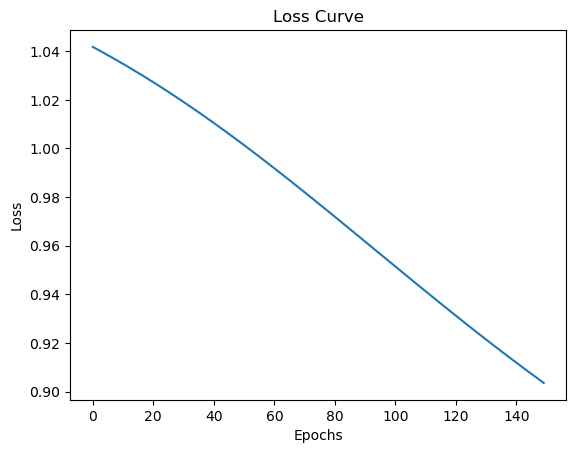

In [27]:
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
